In [1]:
import sys; sys.path.append('..')
from mvtecad_test import *
from fastai.callbacks import SaveModelCallback
fastai_progress_as_text()

PATH = Path('/mnt/dataset/mvtec_ad')

mvtecad = MVTecADTest(PATH, test_type='multi_normals', skip_data_creation=True)

# Test: case0-0-capsule-multi_normals
['train/carpet', 'train/leather', 'train/cable', 'train/capsule']
['test/capsule']

# Test: case1-0-carpet-multi_normals
['train/carpet', 'train/leather', 'train/cable', 'train/capsule']
['test/carpet']

# Test: case2-0-leather-multi_normals
['train/carpet', 'train/leather', 'train/cable', 'train/capsule']
['test/leather']

# Test: case3-0-cable-multi_normals
['train/carpet', 'train/leather', 'train/cable', 'train/capsule']
['test/cable']



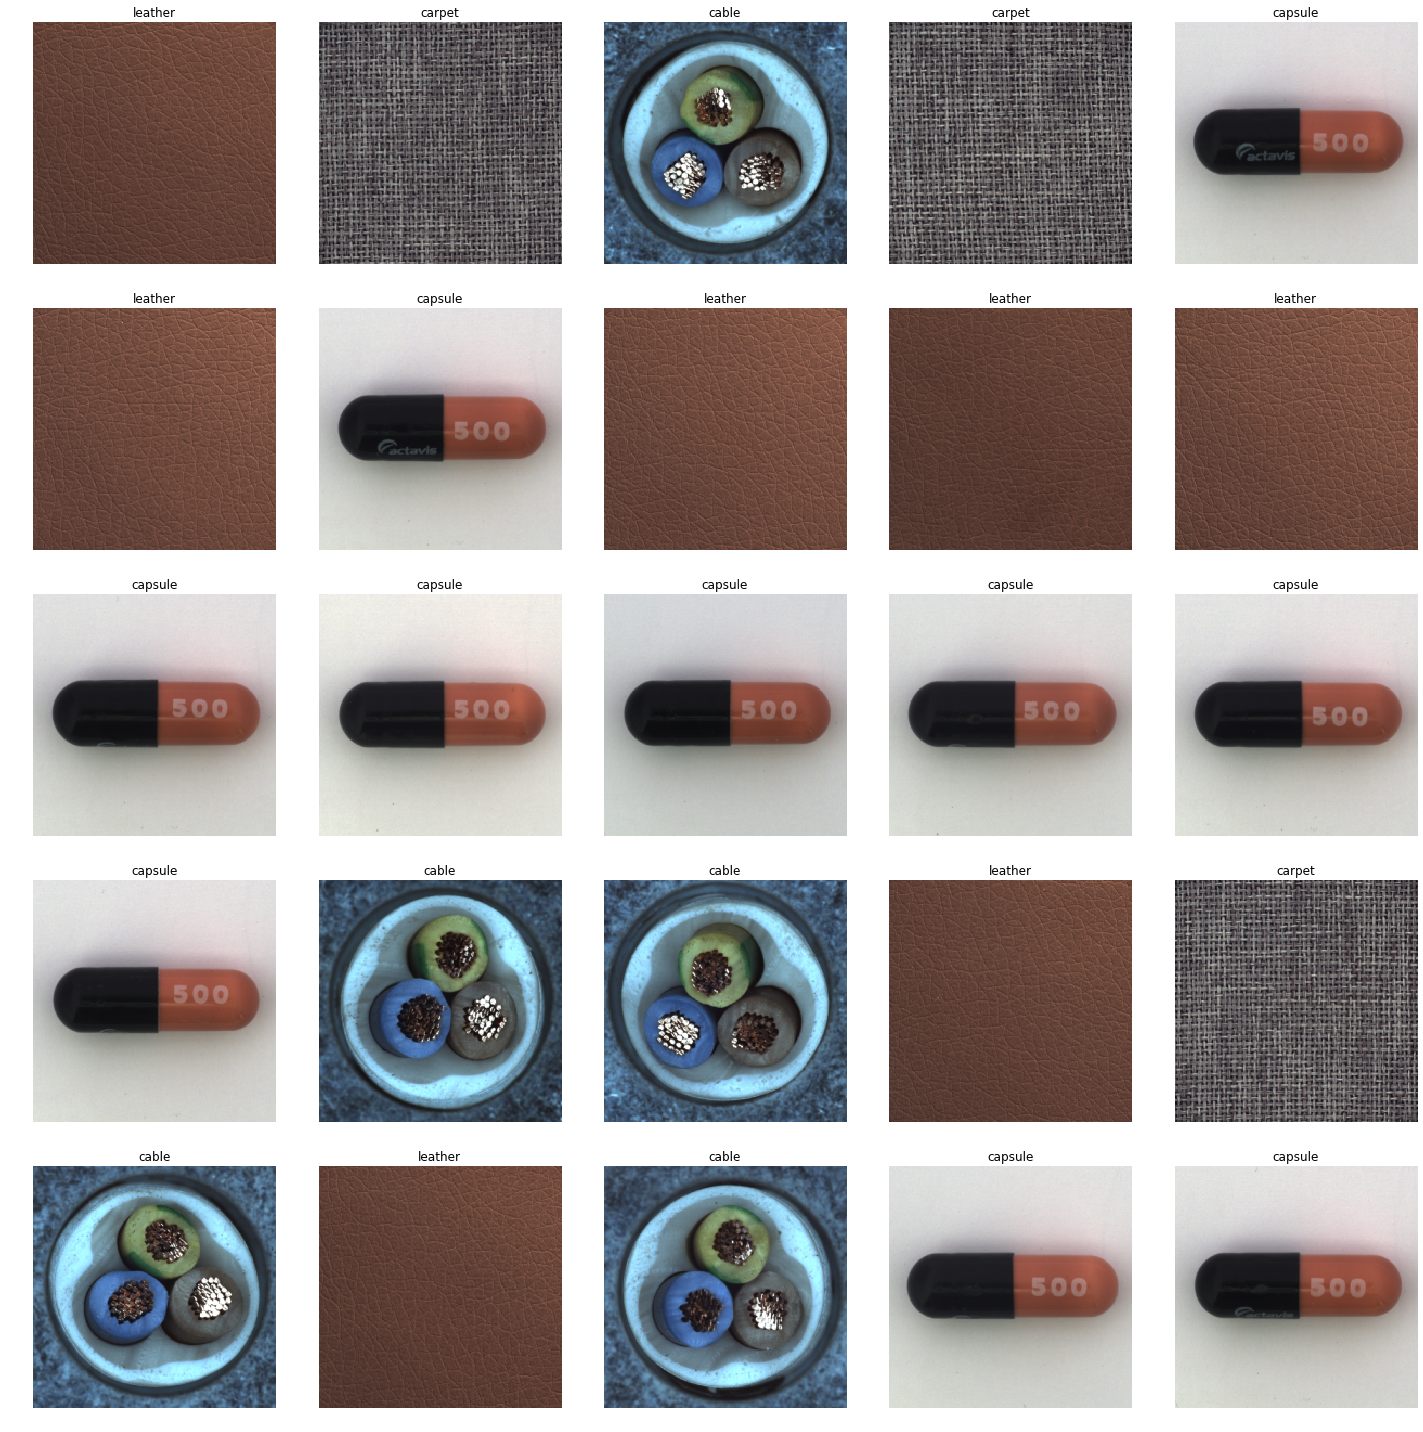

In [2]:
mvtecad.set_test(0, 0)
mvtecad.databunch().show_batch()

In [ ]:
def learner_conventional(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_L2ConstrainedNet(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.model = L2ConstrainedNet(learn.model)
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_ArcFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, ArcMarginProduct, m=0.5)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_CosFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, AddMarginProduct, m=0.4)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_SphereFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, SphereProduct, m=int(4))
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_CenterLoss(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.loss_func = WrapCenterLoss(learn, train_data, weight_cent=1/8)
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

model_defs = {
    'Conventional': learner_conventional,
    'L2Constrained': learner_L2ConstrainedNet,
    'ArcFace': learner_ArcFace,
    'CosFace': learner_CosFace,
    'SphereFace': learner_SphereFace,
    'CenterLoss': learner_CenterLoss,
}
for name, learner_fn in model_defs.items():
    mvtecad.do_tests(name, learner_fn, visualize=[3])

# Stat: AUC


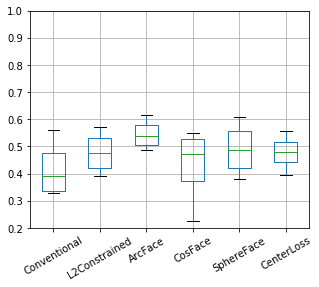

,Conventional,L2Constrained,ArcFace,CosFace,SphereFace,CenterLoss
capsule,0.561428,0.391703,0.485241,0.419426,0.6073,0.45732
carpet,0.336677,0.519462,0.568218,0.52187,0.378812,0.395666
leather,0.329484,0.430707,0.616678,0.227412,0.540931,0.555197
cable,0.445277,0.571214,0.510026,0.550225,0.434033,0.503092


# Stat: Normalized distances


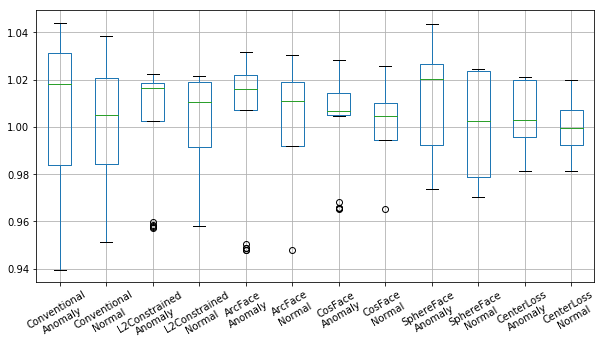

In [6]:
normalized_anomaly_distances, normalized_normal_distances, aucs = mvtecad.test_summary()